In [2]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import f1_score

In [29]:
train_data_dir = '../data/chest_xray/train'
test_data_dir = '../data/chest_xray/test'

generator =ImageDataGenerator(rescale=1/255, validation_split=.25)

train_generator= generator.flow_from_directory(
        train_data_dir, target_size=(224, 224), batch_size=32, color_mode='grayscale', subset='training', class_mode='binary')
validation_set=generator.flow_from_directory(
        train_data_dir, target_size=(224, 224), batch_size=32, color_mode='grayscale', subset='validation', class_mode='binary')
test_generator = generator.flow_from_directory(
        test_data_dir, target_size=(224, 224), batch_size=32, color_mode='grayscale', class_mode='binary')

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 3913 images belonging to 2 classes.
Found 1303 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


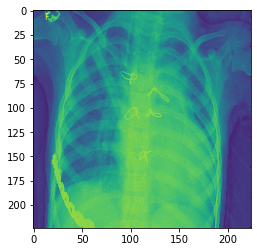

In [43]:
imgplot = plt.imshow(train_images[0])

In [30]:
train_images.shape

(32, 224, 224, 1)

In [31]:
def plot_loss_and_accuracy(results, final=False):
    
    if final:
        val_label="test"
    else:
        val_label="validation"

    # Extracting metrics from model fitting
    train_loss = results.history['loss']
    val_loss = results.history['val_loss']
    train_precision = results.history['precision']
    val_precision = results.history['val_precision']
    train_accuracy = results.history['binary_accuracy']
    val_accuracy = results.history['val_binary_accuracy']

    # Setting up plots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

    # Plotting loss info
    ax1.set_title("Loss")
    sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label="train")
    sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label=val_label)
    ax1.legend()

    #Plotting precision
    ax2.set_title("Precision")
    sns.lineplot(x=results.epoch, y=train_precision, ax=ax2, label="train")
    sns.lineplot(x=results.epoch, y=val_precision, ax=ax2, label=val_label)
    ax2.legend()
    
    # Plotting accuracy info
    ax3.set_title("Accuracy")
    sns.lineplot(x=results.epoch, y=train_accuracy, ax=ax3, label="train")
    sns.lineplot(x=results.epoch, y=val_accuracy, ax=ax3, label=val_label)
    ax3.legend()

In [ ]:
model3 = models.Sequential()
model3.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(224, 224, 1)))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
              metrics=['Recall', 'BinaryAccuracy', 'FalseNegatives'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
                           verbose=1, patience=3,
                           mode='min')
checkpoint = ModelCheckpoint('../data/localdata/chest_xray/BestCNNModel', monitor='val_loss',
    save_best_only= True)

results3 = model3.fit(x=train_images, y=train_labels, epochs=10, validation_data=validation_set, batch_size = 32,
                    callbacks=[early_stop, checkpoint])
plot_loss_and_accuracy(results3)

In [35]:
model3.evaluate(test_images, test_labels)

1/1 [==============================] - 0s 2ms/step - loss: 1.3077 - recall: 1.0000 - binary_accuracy: 0.7500 - false_negatives: 0.0000e+00


[1.3076708316802979, 1.0, 0.75, 0.0]

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(224, 224, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
             loss='BinaryCrossentropy',
             metrics=['accuracy'])
results = model.fit(x=train_images, y= train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1/1 [==============================] - 0s 126ms/step - loss: 0.6891 - accuracy: 0.8750 - val_loss: 0.6686 - val_accuracy: 0.6250
Epoch 2/10
1/1 [==============================] - 0s 23ms/step - loss: 0.5975 - accuracy: 0.7188 - val_loss: 0.8307 - val_accuracy: 0.6250
Epoch 3/10
1/1 [==============================] - 0s 21ms/step - loss: 0.6361 - accuracy: 0.7188 - val_loss: 0.7270 - val_accuracy: 0.6250
Epoch 4/10
1/1 [==============================] - 0s 20ms/step - loss: 0.5842 - accuracy: 0.7188 - val_loss: 0.6648 - val_accuracy: 0.6250
Epoch 5/10
1/1 [==============================] - 0s 21ms/step - loss: 0.5774 - accuracy: 0.7188 - val_loss: 0.6543 - val_accuracy: 0.6250
Epoch 6/10
1/1 [==============================] - 0s 21ms/step - loss: 0.5815 - accuracy: 0.7188 - val_loss: 0.6540 - val_accuracy: 0.6250
Epoch 7/10
1/1 [==============================] - 0s 21ms/step - loss: 0.5592 - accuracy: 0.7188 - val_loss: 0.6765 - val_accuracy: 0.6250
Epoch 8/10
1/1 [==========

Epoch 1/10
123/123 [==============================] - 68s 554ms/step - loss: 0.3202 - precision: 0.8718 - binary_accuracy: 0.8694 - val_loss: 0.1981 - val_precision: 0.9820 - val_binary_accuracy: 0.9163
Epoch 2/10
123/123 [==============================] - 68s 554ms/step - loss: 0.1212 - precision: 0.9658 - binary_accuracy: 0.9525 - val_loss: 0.1378 - val_precision: 0.9797 - val_binary_accuracy: 0.9470
Epoch 3/10
123/123 [==============================] - 67s 548ms/step - loss: 0.0898 - precision: 0.9746 - binary_accuracy: 0.9640 - val_loss: 0.1264 - val_precision: 0.9881 - val_binary_accuracy: 0.9501
Epoch 4/10
123/123 [==============================] - 68s 551ms/step - loss: 0.0799 - precision: 0.9811 - binary_accuracy: 0.9719 - val_loss: 0.1067 - val_precision: 0.9811 - val_binary_accuracy: 0.9616
Epoch 5/10
123/123 [==============================] - 69s 558ms/step - loss: 0.0725 - precision: 0.9801 - binary_accuracy: 0.9711 - val_loss: 0.1044 - val_precision: 0.9801 - val_binary_ac

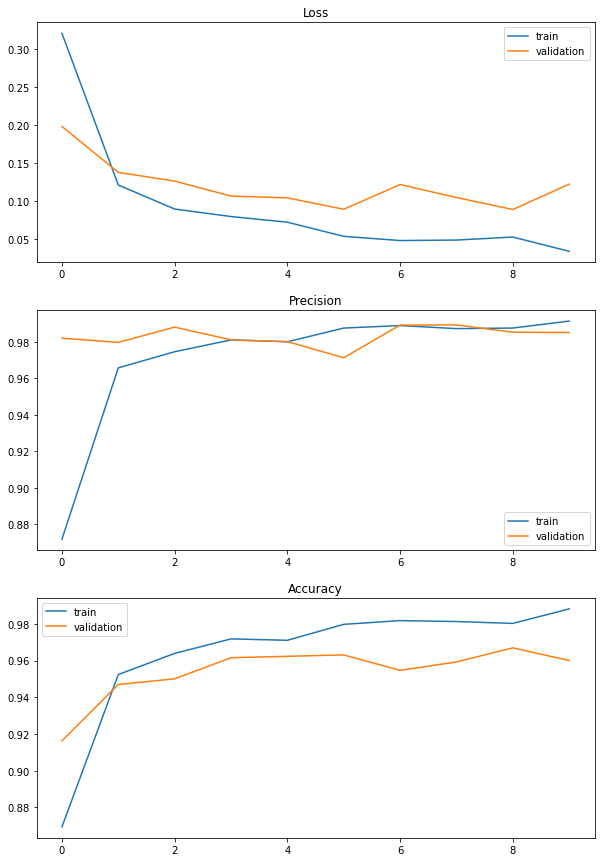

In [12]:
model4 = models.Sequential()
model4.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(224, 224, 1)))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.Flatten())
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
              metrics=['Precision', 'BinaryAccuracy'])
results4 = model4.fit(train_generator, epochs=10, validation_data=validation_set)
plot_loss_and_accuracy(results4)